# Multi-variable Linear Regression

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, Sequential
import numpy as np
import matplotlib.pyplot as plt

tf.__version__

'2.15.0'

# Hypothesis

## $$ H(x_1, x_2, x_3) = \underline{w_1 x_1 + w_2 x_2 + w_3 x_3} + b $$

## $$ = w_1 x_1 + w_2 x_2 + w_3 x_3 $$

## $$ =  \begin{pmatrix} w_{ 1 } & w_{ 2 } & w_{ 3 } \end{pmatrix}\cdot \begin{pmatrix} x_{ 1 } \\ x_{ 2 } \\ x_{ 3 } \end{pmatrix} $$

## $$ H(x_1, x_2, x_3) = WX $$



In [ ]:
x_data = [
    [1., 0., 3., 0., 5.],
    [0., 2., 0., 4., 0.]
]
y_data  = [1, 2, 3, 4, 5]

W = tf.Variable(tf.random.normal([1, 2], -1.0, 1.0))
b = tf.Variable(tf.random.normal([1], -1.0, 1.0))

print(np.array(x_data).shape, np.array(y_data).shape, W.shape, b.shape)

learning_rate = tf.Variable(0.001)

for i in range(100):
   with tf.GradientTape() as tape:
    # (5, 2) * (2, 1) = (5, 1)
    hypothesis = tf.matmul(W, x_data) + b  # w [1, 2] * x [2, 5] = y [1, 5]
    cost = tf.reduce_mean(tf.square(hypothesis - y_data))

    W_grad, b_grad = tape.gradient(cost, [W, b])
    W.assign_sub(learning_rate * W_grad)
    b.assign_sub(learning_rate * b_grad)

    if i % 10 == 0:
        print("step: {:3} \t cost: {:5.4f} \t w[0][0]: {:5.4f} \t w[0][1]: {:5.4f} \t b: {:5.4f}".format(
            i, cost.numpy(), W.numpy()[0][0], W.numpy()[0][1], b.numpy()[0]))

(2, 5) (5,) (1, 2) (1,)
step:   0 	 cost: 57.6327 	 w[0][0]: -0.9979 	 w[0][1]: -2.0579 	 b: 0.6553
step:  10 	 cost: 45.3128 	 w[0][0]: -0.7594 	 w[0][1]: -1.8384 	 b: 0.7800
step:  20 	 cost: 35.8005 	 w[0][0]: -0.5561 	 w[0][1]: -1.6386 	 b: 0.8893
step:  30 	 cost: 28.4272 	 w[0][0]: -0.3831 	 w[0][1]: -1.4565 	 b: 0.9851
step:  40 	 cost: 22.6889 	 w[0][0]: -0.2359 	 w[0][1]: -1.2907 	 b: 1.0690
step:  50 	 cost: 18.2043 	 w[0][0]: -0.1107 	 w[0][1]: -1.1394 	 b: 1.1427
step:  60 	 cost: 14.6847 	 w[0][0]: -0.0043 	 w[0][1]: -1.0015 	 b: 1.2073
step:  70 	 cost: 11.9107 	 w[0][0]: 0.0861 	 w[0][1]: -0.8755 	 b: 1.2639
step:  80 	 cost: 9.7149 	 w[0][0]: 0.1627 	 w[0][1]: -0.7606 	 b: 1.3136
step:  90 	 cost: 7.9694 	 w[0][0]: 0.2277 	 w[0][1]: -0.6556 	 b: 1.3571


## Test Score


x1 | x2 | x3 | Y
---- | ---- | ----| ----
96 | 91 | 99 | 194
88 | 85 | 82 | 181
78 | 77 | 73 | 177
67 | 66 | 61 | 164
55 | 51 | 53 | 157

# Hypothesis using matrix

$$ [5, 3] \cdot [?, ?] = [5, 1] $$

$$ H(X) = XW + b $$


In [ ]:
data = np.array([
    # X1,   X2,    X3,   Y
    [ 96.,  91.,  99., 194. ],
    [ 88.,  85.,  82., 181. ],
    [ 78.,  77.,  73., 177. ],
    [ 67.,  66., 61., 164. ],
    [ 55.,  51.,  53., 157. ]
], dtype=np.float32)

# slice data
X = data[:, :-1]
print(X.shape)
y = data[:, [-1]]
print(y.shape)

# Model
W = tf.Variable(tf.random.normal([3, 1]))
b = tf.Variable(tf.random.normal([1]))

learning_rate = 0.00001

def predict(X):
    return tf.matmul(X, W) + b

print("epoch | cost")

n_epochs = 1000
for i in range(n_epochs):
    # tf.GradientTape() to record the gradient of the cost function
    with tf.GradientTape() as tape:
        cost = tf.reduce_mean((tf.square(predict(X) - y)))

    # Loss함수의 gradient를 계산한다.
    W_grad, b_grad = tape.gradient(cost, [W, b])

    # 파라미터 업데이트 (W and b) -> Optimizer!
    W.assign_sub(learning_rate * W_grad)
    b.assign_sub(learning_rate * b_grad)

    if i % 100 == 0:
        print("{:5} | {:10.4f}".format(i, cost.numpy()))

(5, 3)
(5, 1)
epoch | cost
    0 |  4089.8391
  100 |   519.6908
  200 |   513.1476
  300 |   506.9138
  400 |   500.9745
  500 |   495.3146
  600 |   489.9206
  700 |   484.7791
  800 |   479.8778
  900 |   475.2043


## 데이터를 기반으로예측해보자

In [ ]:
def predict(X):
    return tf.matmul(X, W) + b # 위쪽에 선언되어 있다.

predict(X).numpy() # prediction, 예측값

array([[218.69296 ],
       [193.30124 ],
       [172.07545 ],
       [146.2435  ],
       [121.600395]], dtype=float32)

In [ ]:
W

<tf.Variable 'Variable:0' shape=(3, 1) dtype=float32, numpy=
array([[1.1007525 ],
       [0.2980365 ],
       [0.87044007]], dtype=float32)>

In [ ]:
# 새로운 데이터에 대한 예측

predict([[ 89.,  95.,  92.],[ 84.,  92.,  85.]]).numpy()

array([[206.08676],
       [193.5958 ]], dtype=float32)

### with Tensorflow

In [ ]:
data = np.array([
    # X1,   X2,    X3,   y
    [ 96.,  91.,  99., 194. ],
    [ 88.,  85.,  82., 181. ],
    [ 78.,  77.,  73., 177. ],
    [ 67.,  66., 61., 164. ],
    [ 55.,  51.,  53., 157. ]
], dtype=np.float32)

# slice data
X = data[:, :-1]
y = data[:, [-1]] # Raw data

# tf.data generate data from raw data
dataset = tf.data.Dataset.from_tensor_slices((X, y))
dataset = dataset.batch(batch_size=1)

model = Sequential([
    layers.Dense(1, activation='linear')
])

model.compile(optimizer='adam', # W assign_sub
              loss='mse', # mse, mae
              metrics=['mse'])

model.fit(dataset, epochs=1000) # tf.GradientTape 교체가능!

Epoch 1/1000
5/5 [==============================] - 1s 4ms/step - loss: 55264.8828 - mse: 55264.8828
Epoch 2/1000
5/5 [==============================] - 0s 3ms/step - loss: 54751.5547 - mse: 54751.5547
Epoch 3/1000
5/5 [==============================] - 0s 3ms/step - loss: 54246.3984 - mse: 54246.3984
Epoch 4/1000
5/5 [==============================] - 0s 3ms/step - loss: 53744.1758 - mse: 53744.1758
Epoch 5/1000
5/5 [==============================] - 0s 3ms/step - loss: 53244.5078 - mse: 53244.5078
Epoch 6/1000
5/5 [==============================] - 0s 4ms/step - loss: 52747.4297 - mse: 52747.4297
Epoch 7/1000
5/5 [==============================] - 0s 3ms/step - loss: 52253.0391 - mse: 52253.0391
Epoch 8/1000
5/5 [==============================] - 0s 3ms/step - loss: 51761.4453 - mse: 51761.4453
Epoch 9/1000
5/5 [==============================] - 0s 3ms/step - loss: 51272.7578 - mse: 51272.7578
Epoch 10/1000
5/5 [==============================] - 0s 3ms/step - loss: 50787.0625 - mse: 

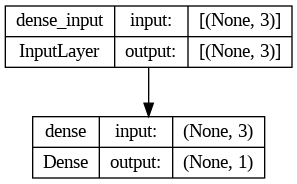

In [ ]:
tf.keras.utils.plot_model(model, show_shapes=True)

In [ ]:
test_loss, test_mae = model.evaluate(X, y, verbose=0)
print('Test MSE:', test_mae)

Test MSE: 471.90838623046875


In [ ]:
for x, y in dataset:
    print(x)
    print(y)
    print(model(x))
    break

tf.Tensor([[96. 91. 99.]], shape=(1, 3), dtype=float32)
tf.Tensor([[194.]], shape=(1, 1), dtype=float32)
tf.Tensor([[219.64958]], shape=(1, 1), dtype=float32)
